In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
recipes=pd.read_csv("recipes.csv")
recipes

,'acorn squash',adobo,'african birdseye chile pepper',ale,'aleppo pepper','alfalfa sprouts','alfredo sauce',allspice,almond,'almond butter',...,yeast,'yellow curry paste','yellow food coloring','yellow split pea','yellow squash',yogurt,zaatar,zest,zucchini,cuisine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
4232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
4233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
4234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11


In [2]:
#top 5 ingredients for different cuisine type

for i in range(0,12):
    print(recipes[recipes['cuisine']==i].drop('cuisine', axis=1).sum(axis=0).sort_values(ascending=False)[0:5].keys())
    #print(recipes[recipes['cuisine']==i].drop('cuisine', axis=1).sum(axis=0).sort_values(ascending=False)[0:5])

Index([''soy sauce'', 'garlic', 'ginger', 'cornstarch', ''green onion''], dtype='object')
Index(['onion', 'butter', 'potato', 'garlic', 'flour'], dtype='object')
Index(['garlic', 'butter', 'wine', 'onion', ''olive oil''], dtype='object')
Index(['onion', 'pepper', 'salt', 'flour', 'water'], dtype='object')
Index([''olive oil'', 'garlic', 'onion', 'oregano', 'tomato'], dtype='object')
Index(['onion', 'garlic', 'ginger', 'cumin', 'turmeric'], dtype='object')
Index(['garlic', ''olive oil'', ''parmesan cheese'', 'onion', 'pasta'], dtype='object')
Index([''soy sauce'', ''rice wine'', 'sugar', 'ginger', 'garlic'], dtype='object')
Index(['onion', 'tortilla', 'garlic', 'cumin', 'salt'], dtype='object')
Index(['onion', 'garlic', ''olive oil'', 'cumin', 'cinnamon'], dtype='object')
Index(['garlic', ''olive oil'', 'onion', 'tomato', 'chicken'], dtype='object')
Index(['garlic', ''fish sauce'', 'chicken', ''coconut milk or cream'', 'lime'], dtype='object')


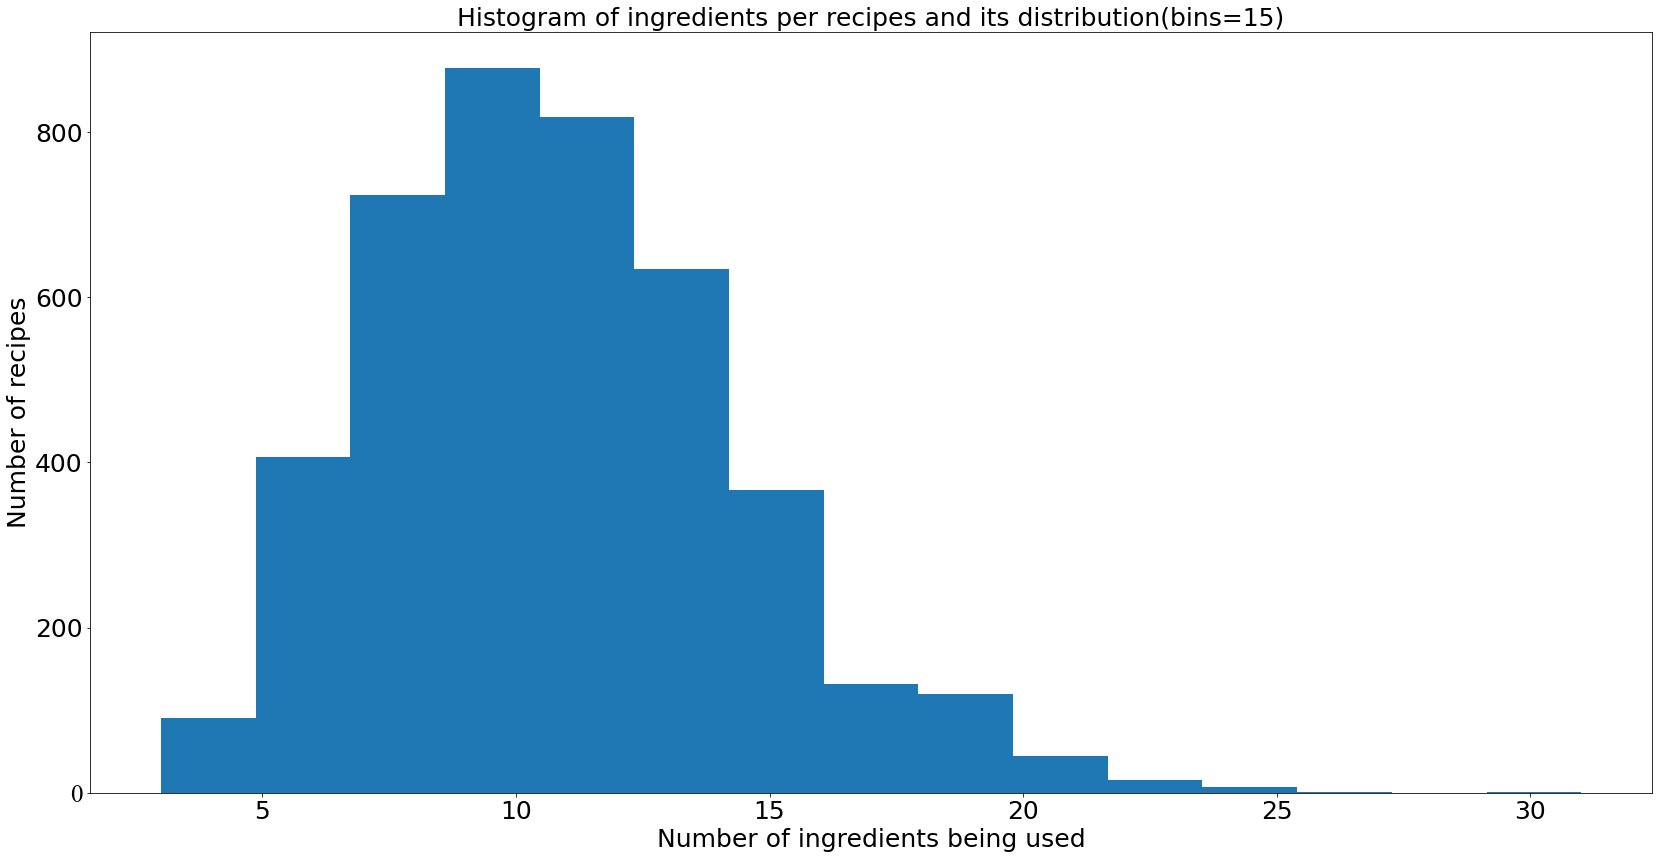

In [6]:
#Showing the histogram of ingredients of each recipes and its distribution
array_data=np.array(recipes.drop('cuisine',axis=1).sum(axis=1))
plt.figure(figsize=(28,14))
plt.hist(array_data,bins=15)
plt.title("Histogram of ingredients per recipes and its distribution(bins=15)",fontsize=25)
plt.ylabel('Number of recipes',fontsize=25)
plt.xlabel('Number of ingredients being used',fontsize=25)
plt.yticks(fontproperties = 'Times New Roman', size = 25)
plt.xticks(fontproperties = 'Times New Roman', size = 25)
plt.savefig('fig1',dpi=200)
plt.show()

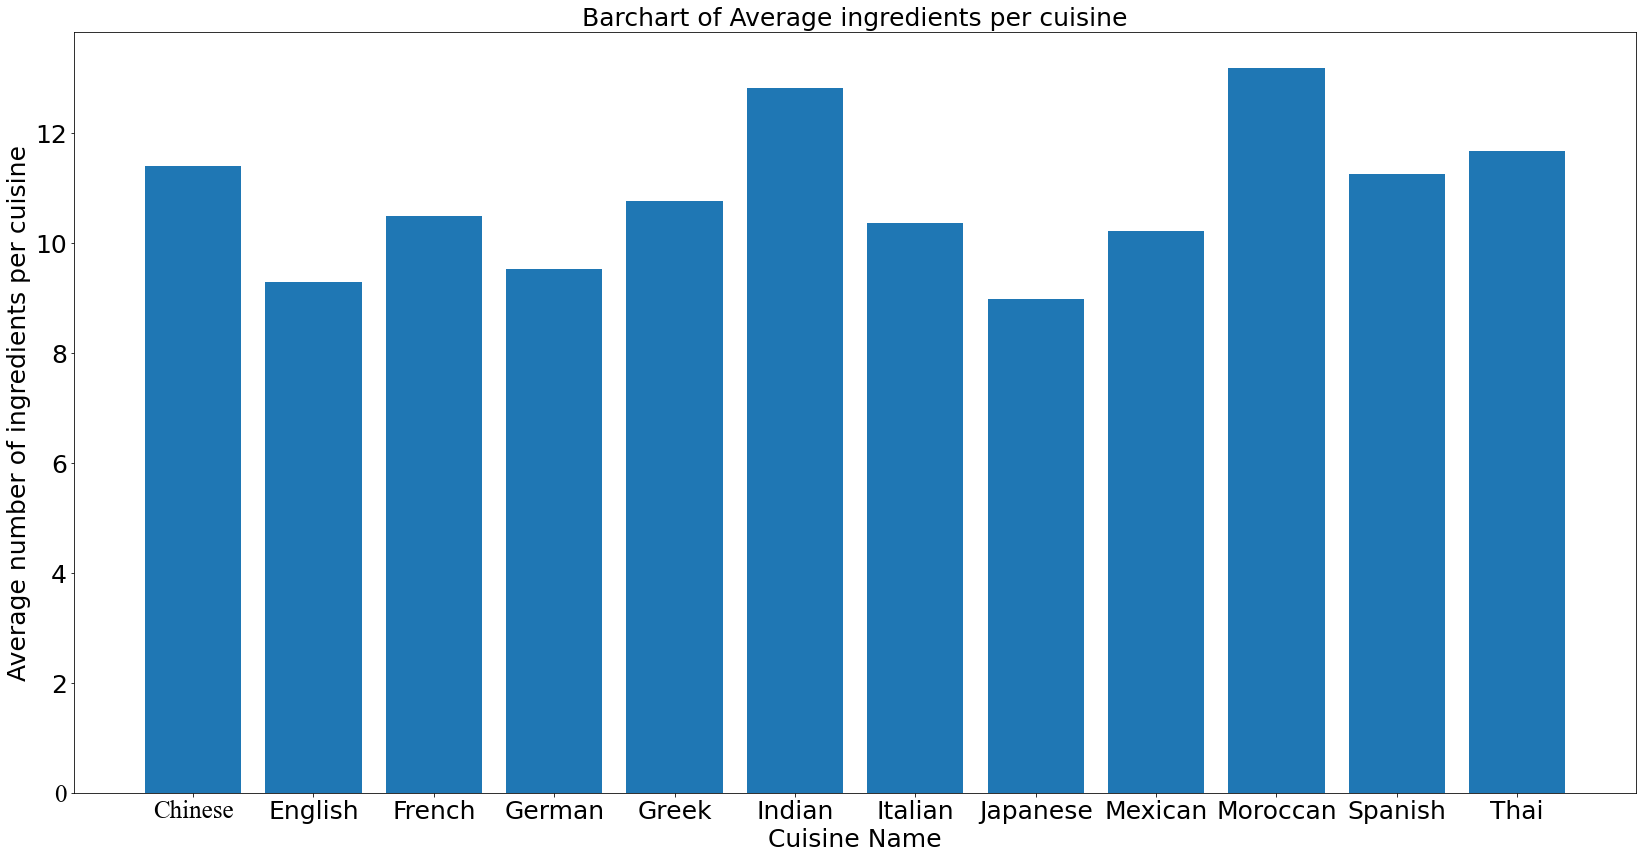

In [7]:
#Showing the average ingredients used for each cuisine
mean_array=[]
for i in range(0,12):
    mean_array.append(recipes[recipes['cuisine']==i].drop('cuisine',axis=1).sum(axis=1).mean())
cuisine_name=pd.read_csv('Cuisines.csv')
Name_array=cuisine_name['Name']
plt.figure(figsize=(28,14))
plt.bar(Name_array,mean_array)
plt.yticks(fontproperties = 'Times New Roman', size = 25)
plt.xticks(fontproperties = 'Times New Roman', size = 25)
plt.ylabel('Average number of ingredients per cuisine',fontsize=25)
plt.xlabel('Cuisine Name',fontsize=25)
plt.title("Barchart of Average ingredients per cuisine",fontsize=25)
plt.savefig('fig2',dpi=200)
plt.show()


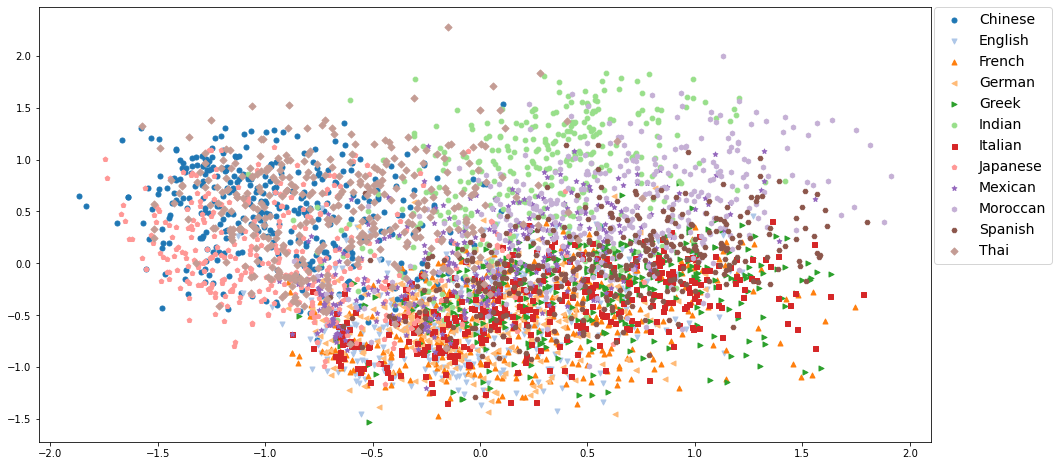

In [5]:
#Applying pca to reduce data to two dimension to visulize data
import matplotlib.colors as mcolors
from sklearn.decomposition import PCA 
recipes_x=recipes.drop('cuisine',axis=1)
recipes_y=recipes['cuisine']
pca = PCA(n_components=2)
recipes_2d=pca.fit_transform(recipes_x)
recipes_2d=np.hstack((recipes_2d,np.array(recipes_y).reshape(4236,1)))


fig,ax=plt.subplots(figsize=(16,8))
color_range=np.arange(0,255,255/12)
marker_type=['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
for i in range(0,12):
    ax.scatter(recipes_2d[i*353:(i+1)*353,0],recipes_2d[i*353:(i+1)*353,1],color=plt.get_cmap('tab20')(range(12))[i],label=Name_array[i]
              ,s=25,marker=marker_type[i])
    ax.legend(bbox_to_anchor=(0.643, 0.515, 0.5, 0.5),fontsize=14)


plt.savefig('fig3')
plt.show()


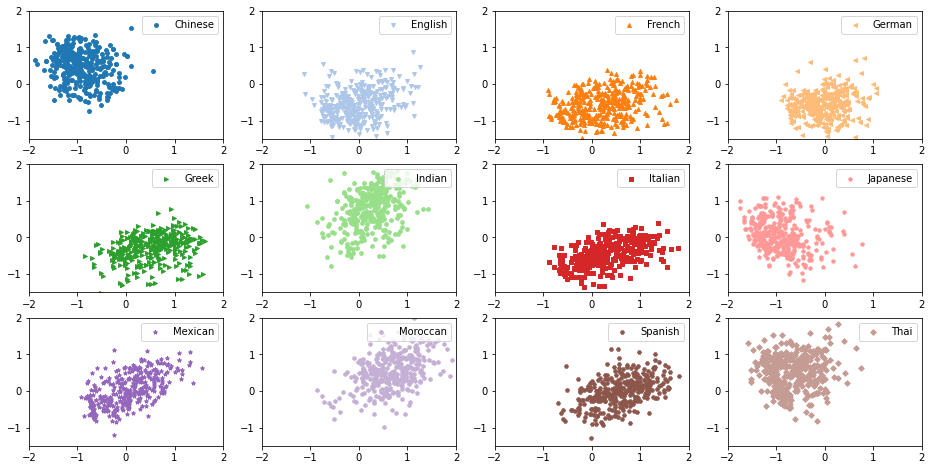

In [6]:
#Applying pca to reduce data to two dimension to visulize data
import matplotlib.colors as mcolors
from sklearn.decomposition import PCA 
recipes_x=recipes.drop('cuisine',axis=1)
recipes_y=recipes['cuisine']
pca = PCA(n_components=2)
recipes_2d=pca.fit_transform(recipes_x)
recipes_2d=np.hstack((recipes_2d,np.array(recipes_y).reshape(4236,1)))

fig=plt.figure(figsize=(16,8)) 
marker_type=['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
for i in range(0,12):
    plt.subplot(3,4,i+1)
    plt.scatter(recipes_2d[i*353:(i+1)*353,0],recipes_2d[i*353:(i+1)*353,1],color=plt.get_cmap('tab20')(range(12))[i],label=Name_array[i]
              ,s=15,marker=marker_type[i])
    plt.legend(loc='upper right')
    plt.xlim(-2,2)
    plt.ylim(-1.5,2)


plt.savefig('fig4')
plt.show()


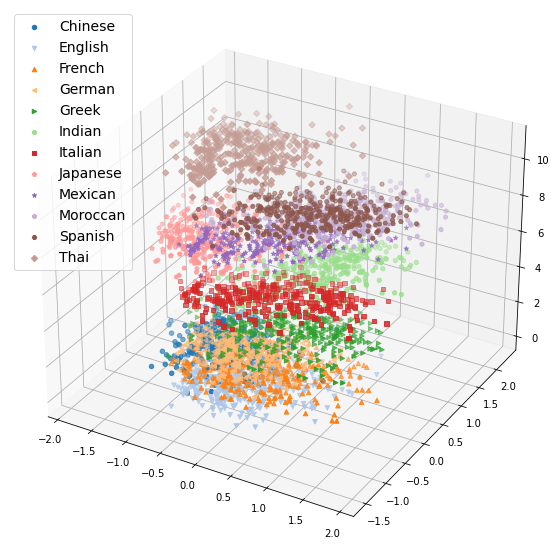

In [7]:
#Applying pca to reduce data to two dimension to visulize data
import matplotlib.colors as mcolors
from sklearn.decomposition import PCA 
recipes_x=recipes.drop('cuisine',axis=1)
recipes_y=recipes['cuisine']
pca = PCA(n_components=2)
recipes_2d=pca.fit_transform(recipes_x)
recipes_2d=np.hstack((recipes_2d,np.array(recipes_y).reshape(4236,1)))

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection = '3d')
marker_type=['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
for i in range(0,12):
    ax.scatter(recipes_2d[i*353:(i+1)*353,0],recipes_2d[i*353:(i+1)*353,1],np.ones(353)*i,color=plt.get_cmap('tab20')(range(12))[i],label=Name_array[i]
              ,s=20,marker=marker_type[i])
    ax.legend(loc='best',fontsize=14)
    
plt.savefig('fig5')
plt.show()
